# ORIE 3120 Homework 9
### Due May 6 at 11:59pm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Problem 1

High school graduation is important. Roughly 15% of students in U.S. high schools do not graduate in 4 years, and these students go on to have substantially worse economic outcomes than students who do graduate from high school. In this question we'll conduct a power analysis for a randomized controlled trial for a school program aimed at increasing high school graduation rates.

### Part (a) 
Start by reading this in `chicago_schools.csv`, which contains the graduation rates in years 2018 and 2019 for each school in the Chicago public school system. These entries in the csv have `%` at the end of them, causing pandas to interpret them as a string. You will first need to remove this and convert to a fraction. In general, you can quickly convert a dataframe column with strings like `99%` to numbers like `0.99` using the code `df['col'].str.rstrip('%').astype('float') / 100.0`.  Use this to convert the graduation rate columns to fractions.

Then, write code that simulates an experiment in which `N` schools are randomly selected, and then these schools are randomly assigned to treatment and control. At schools in treatment, a program is run that is aimed at increasing graduation rates. Assume that this program adds a constant `treatment_effect` to the 2019 graduation rate at each school where it is run. (For big treatmet effects, this could increase the graduation rate above 1, but we won't worry about that here.)

Your code should be a function called `sim_xp` that takes `N` and `treatment_effect` as inputs and returns whether the analysis of the experiment found the treatment have a statistically significant effect. This should return the answer encoded either as a boolean value (`True` or `False`) or an integer (0 for `False` and 1 for `True`).

Run your code with a treatment effect of 0 and N set to 100.  You should see that it returns that a statistically significant effect was not found most of the time that you run it.

In [4]:
df_schools = pd.read_csv('chicago_schools.csv')
df_schools.head()

,School ID,School Name,2018 Graduation Rate,2019 Graduation Rate
0,400121,ACERO - DE LA CRUZ,78.10%,79.50%
1,400085,ACERO - GARCIA HS,86.30%,87.30%
2,400149,ACERO - SOTO HS,83.90%,71.40%
3,610513,AIR FORCE HS,81.90%,83.70%
4,610524,ALCOTT HS,84.90%,92.10%


In [5]:
df_schools['2018 Graduation Rate'] = df_schools['2018 Graduation Rate'].str.rstrip('%').astype('float') / 100.0
df_schools['2019 Graduation Rate'] = df_schools['2019 Graduation Rate'].str.rstrip('%').astype('float') / 100.0
df_schools.head()

,School ID,School Name,2018 Graduation Rate,2019 Graduation Rate
0,400121,ACERO - DE LA CRUZ,0.781,0.795
1,400085,ACERO - GARCIA HS,0.863,0.873
2,400149,ACERO - SOTO HS,0.839,0.714
3,610513,AIR FORCE HS,0.819,0.837
4,610524,ALCOTT HS,0.849,0.921


In [42]:
def sim_xp(N, treatment_effect):
    df_experiment2 = df_schools.sample(N)
    df_experiment2['treatment'] = np.random.choice(2, N)
    df_experiment2['Boosted Graduation Rate'] = df_experiment2['2019 Graduation Rate'] + (df_experiment2['treatment']*treatment_effect)
    X2 = df_experiment2['treatment']
    y2 = df_experiment2['Boosted Graduation Rate']
    X2 = sm.add_constant(X2)
    model2 = sm.OLS(y2,X2).fit()
    if model2.pvalues['treatment'] <= .05:
        return(1)
    else:
        return(0)

In [47]:
sim_xp2(100,0)

0

### Part b

Now write a function that runs `sim_xp` multiple times and averages the output to calculate the power of the experiment.  Using 1000 replications of `sim_xp` for each point, plot the power versus `n` for a treatment effect of 0.01 (i.e., 1%), 0.05 (5%), and 0.10 (10%) on the same graph. Vary from 50 to 135 in steps of 5.

In [44]:
def run_sim_xp():
    size = 50
    plot1_y = []
    plot2_y = []
    plot3_y = []        
    plot_x = []

    
    for i in range(18): #18 multiples of 5 between 50 and 135
        average_power_1 = []
        average_power_5 = []
        average_power_10 = []
        
        for j in range(1000):
            average_power_1.append(sim_xp(size, .01))
            average_power_5.append(sim_xp(size, .05))
            average_power_10.append(sim_xp(size, .10))
            
            if j > 100 and j % 100 == 0:
                print(j) 
                
        plot1_y.append(np.mean(average_power_1))
        plot_x.append(size)
        plot2_y.append(np.mean(average_power_5))
        plot3_y.append(np.mean(average_power_10))
        print(plot1_y)
        print(plot2_y)
        print(plot3_y)
        print(plot_x)
        
        size += 5
        
    plt.plot(plot_x, plot1_y, marker='.', markersize = 4, color='blue')
    plt.plot(plot_x, plot2_y, marker='.', markersize = 4, color='red')
    plt.plot(plot_x, plot3_y, marker='.', markersize = 4, color='green')
    my_plot = plt.show()

200
300
400
500
600
700
800
900
[0.056]
[0.213]
[0.572]
[50]
200
300
400
500
600
700
800
900
[0.056, 0.048]
[0.213, 0.211]
[0.572, 0.619]
[50, 55]
200
300
400
500
600
700
800
900
[0.056, 0.048, 0.065]
[0.213, 0.211, 0.216]
[0.572, 0.619, 0.665]
[50, 55, 60]
200
300
400
500
600
700
800
900
[0.056, 0.048, 0.065, 0.067]
[0.213, 0.211, 0.216, 0.241]
[0.572, 0.619, 0.665, 0.688]
[50, 55, 60, 65]
200
300
400
500
600
700
800
900
[0.056, 0.048, 0.065, 0.067, 0.062]
[0.213, 0.211, 0.216, 0.241, 0.296]
[0.572, 0.619, 0.665, 0.688, 0.724]
[50, 55, 60, 65, 70]
200
300
400
500
600
700
800
900
[0.056, 0.048, 0.065, 0.067, 0.062, 0.049]
[0.213, 0.211, 0.216, 0.241, 0.296, 0.264]
[0.572, 0.619, 0.665, 0.688, 0.724, 0.762]
[50, 55, 60, 65, 70, 75]
200
300
400
500
600
700
800
900
[0.056, 0.048, 0.065, 0.067, 0.062, 0.049, 0.051]
[0.213, 0.211, 0.216, 0.241, 0.296, 0.264, 0.322]
[0.572, 0.619, 0.665, 0.688, 0.724, 0.762, 0.791]
[50, 55, 60, 65, 70, 75, 80]
200
300
400
500
600
700
800
900
[0.056, 0.048, 0

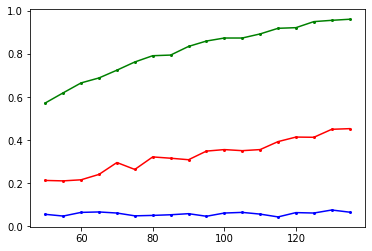

In [45]:
run_sim_xp()

### Part c

You probably saw in the previous example that the power was pretty high when we used all the schools in our experiment when the treatment effect was 10%, but wasn't very good for a treatmet effect of 1% and 5%. It is a lot to hope that a school program could boost graduation rates by 10%, so this likely means that this experiment with this analysis probably won't have great power.

There is a simple way to improve power. This is by adding in the 2018 graduation rate as an extra predictor to the regression used to estimate the treatment effect. Write code that does this and make the plots from part (b) using this new analysis method.

This works because the 2019 graduation rate is highly correlated with the 2018 regression rate. By adding the 2018 graduation rate in to the regression as a predictor, we allow the regression to treat some of the differences between schools as being due to the 2018 graduation rate rather than noise. This allows it to better see the differences caused by the treatment. This idea works in other situations --- whenever we have a covariate collected before the experiment began that is predictive of what the experiment's outcome of interest is.

In [50]:
def sim_xp2(N, treatment_effect):
    df_experiment2 = df_schools.sample(N)
    df_experiment2['treatment'] = np.random.choice(2, N)
    df_experiment2['Boosted Graduation Rate'] = df_experiment2['2019 Graduation Rate'] + (df_experiment2['treatment']*treatment_effect)
    X2 = df_experiment2[['treatment', '2018 Graduation Rate']]
    y2 = df_experiment2['Boosted Graduation Rate']
    X2 = sm.add_constant(X2)
    model2 = sm.OLS(y2,X2).fit()
    if model2.pvalues['treatment'] <= .05:
        return(1)
    else:
        return(0)

In [51]:
def run_sim_xp2():
    size = 50
    plot1_y = []
    plot2_y = []
    plot3_y = []        
    plot_x = []

    
    for i in range(18): #18 multiples of 5 between 50 and 135
        average_power_1 = []
        average_power_5 = []
        average_power_10 = []
        
        for j in range(1000):
            average_power_1.append(sim_xp2(size, .01))
            average_power_5.append(sim_xp2(size, .05))
            average_power_10.append(sim_xp2(size, .10))
            
            if j > 100 and j % 100 == 0:
                print(j) 
                
        plot1_y.append(np.mean(average_power_1))
        plot_x.append(size)
        plot2_y.append(np.mean(average_power_5))
        plot3_y.append(np.mean(average_power_10))
        print(plot1_y)
        print(plot2_y)
        print(plot3_y)
        print(plot_x)
        
        size += 5
        
    plt.plot(plot_x, plot1_y, marker='.', markersize = 4, color='blue')
    plt.plot(plot_x, plot2_y, marker='.', markersize = 4, color='red')
    plt.plot(plot_x, plot3_y, marker='.', markersize = 4, color='green')

200
300
400
500
600
700
800
900
[0.085]
[0.791]
[1.0]
[50]
200
300
400
500
600
700
800
900
[0.085, 0.1]
[0.791, 0.85]
[1.0, 1.0]
[50, 55]
200
300
400
500
600
700
800
900
[0.085, 0.1, 0.103]
[0.791, 0.85, 0.842]
[1.0, 1.0, 1.0]
[50, 55, 60]
200
300
400
500
600
700
800
900
[0.085, 0.1, 0.103, 0.109]
[0.791, 0.85, 0.842, 0.901]
[1.0, 1.0, 1.0, 1.0]
[50, 55, 60, 65]
200
300
400
500
600
700
800
900
[0.085, 0.1, 0.103, 0.109, 0.1]
[0.791, 0.85, 0.842, 0.901, 0.909]
[1.0, 1.0, 1.0, 1.0, 1.0]
[50, 55, 60, 65, 70]
200
300
400
500
600
700
800
900
[0.085, 0.1, 0.103, 0.109, 0.1, 0.115]
[0.791, 0.85, 0.842, 0.901, 0.909, 0.935]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[50, 55, 60, 65, 70, 75]
200
300
400
500
600
700
800
900
[0.085, 0.1, 0.103, 0.109, 0.1, 0.115, 0.102]
[0.791, 0.85, 0.842, 0.901, 0.909, 0.935, 0.945]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[50, 55, 60, 65, 70, 75, 80]
200
300
400
500
600
700
800
900
[0.085, 0.1, 0.103, 0.109, 0.1, 0.115, 0.102, 0.116]
[0.791, 0.85, 0.842, 0.901, 0.909, 0.935, 0

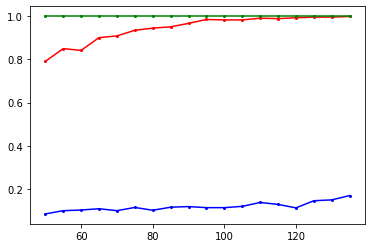

In [53]:
run_sim_xp2()

# Problem 2

We have data in the dataframe `df` below on a collection of people containing information about each individual's:
* age
* body fat percentage
* whether they were treated with medicine for high blood pressure
* their blood pressure (if they were treated, the measurement was taken after treatment)

The code that creates `df` represents the effect of age and body fat percentage on blood pressure, the effect of blood pressure on whether an individual seeks treatment, and the effect of the treatment on their blood pressure.

(Note: this simulation is based on Table 1 and the regression results in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/pdf/medscimonit-19-612.pdf)

In [55]:
def logistic(x):
    return 1./(1+np.exp(-x))

n = 10000
df = pd.DataFrame()

df['age'] = np.random.normal(46.1, 16.6, n)
df['bfp'] = np.random.normal(23.3,7.0,n) # body fat percentage
blood_pressure_before_medicine = 112.15 + 0.89*df['bfp']-0.003*df['age']

prob_seek_treatment = logistic(.5*(blood_pressure_before_medicine-130))
df['is_treated'] = (np.random.rand(n)<prob_seek_treatment).astype(int)
df['blood_pressure'] = blood_pressure_before_medicine - df['is_treated'] * 10

In [57]:
df.head()

,age,bfp,is_treated,blood_pressure
0,4.989011,17.002007,0,127.266819
1,15.836296,22.316479,1,121.964158
2,33.023887,38.607183,1,136.411321
3,63.080982,15.438162,0,125.700721
4,19.985346,37.963104,1,135.877207


### Part a
Fit a regression of `blood_pressure` on `is_treated`. What is the estimated treatment effect from this regression?  Based on the simulation code above, what is the causal effect of the treatment on blood pressure?  If these two numbers are different, why are they different?

In [68]:
X = df['is_treated']
y = df['blood_pressure']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 03 May 2021   Prob (F-statistic):           3.50e-36
Time:                        17:37:24   Log-Likelihood:                -29325.
No. Observations:               10000   AIC:                         5.865e+04
Df Residuals:                    9998   BIC:                         5.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.0641      0.077   1651.711      0.000     126.913     127.215
is_treated    -1.2021      0.095    -12.610      0.000      -1.389      -1.015
==============================================================================
Omnibus:                       96.543   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.317
Skew:                           0.210   Prob(JB):                     2.23e-23
Kurtosis:                       3.271   Cond. No.                         3.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i) The estimated treatment effect is -1.2021

ii) Based on the simulation above, the estimated treatment effect is -10

iii) These two numbers might be different because the counfounding variable driving the causation is 'bfp' and is not included as a predictor in this model. As shown below, when 'bfp' is included as a predictor, the regression correctly estimates the casual treatment effect.

### Part b
Using only the dataframe and your knowledge of how the data was generated, design a regression that correctly estimates the causal effect.

In [125]:
n = 10000
df2 = pd.DataFrame()

df2['age'] = np.random.normal(46.1, 16.6, n)
df2['bfp'] = np.random.normal(23.3,7.0,n) # body fat percentage
blood_pressure_before_medicine2 = 112.15 + 0.89*df2['bfp']-0.003*df2['age']

prob_seek_treatment2 = logistic(.5*(blood_pressure_before_medicine2-130))
df2['is_treated'] = (np.random.rand(n)<prob_seek_treatment2).astype(int)
df2['blood_pressure'] = blood_pressure_before_medicine2 - df2['is_treated'] * 10

In [128]:
df2.head()

,age,bfp,is_treated,blood_pressure
0,47.591242,28.217444,1,127.120752
1,46.623768,29.406578,1,128.181983
2,52.271866,20.086212,1,119.869913
3,63.281491,30.049858,1,128.704529
4,23.599959,31.278267,1,129.916858


In [129]:
X_2 = df2[['is_treated', 'bfp']]
y_2 = df2['blood_pressure']
X_2 = sm.add_constant(X_2)
model2 = sm.OLS(y_2, X_2).fit()

In [130]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         blood_pressure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.324e+07
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        17:50:12   Log-Likelihood:                 15817.
No. Observations:               10000   AIC:                        -3.163e+04
Df Residuals:                    9997   BIC:                        -3.161e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.0120      0.002   6.17e+04      0.000     112.008     112.016
is_treated    -9.9994      0.001  -6985.739      0.000     -10.002      -9.997
bfp            0.8900   9.62e-05   9255.883      0.000       0.890       0.890
==============================================================================
Omnibus:                        3.017   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.993
Skew:                           0.033   Prob(JB):                        0.224
Kurtosis:                       3.053   Cond. No.                         95.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Problem 3

Recall that in EOQ, we assume that the rate at which cost accrues due to holding inventory amount $I(t)$ at moment in time $t$ is $h I(t)$.

Calculate what the optimal order quantity would be if this were instead $h I(t)^2$. Assume, as we do in EOQ, that the time over which we calculate cost is a multiple of $T$.

**ANSWER 3**

In this problem, we will be considering a case where the holding cost is equal to $hI(t)^2$ as specified above. 

Thus, cost equation G that we will be trying to minimize will look like: $G = \tfrac{k* \lambda}{Q} + c\lambda + hI(t)^2$

The next step is to rewrite the funciton I(t) in terms of Q, T, and t. We can do this by visualizing I(t) on the inventory graph. I(t) is supposed to be the quantity at time t, or the y-value on the graph at an x-value of t. 

To find this, I like to think about the actual demand curve, which has a y-intercept of Q and a slope of $\lambda$, or Q/T. 

Thus, the value of such a function would equal I(t) = $Q - \tfrac{Q}{T}t$, and $I(t)^2 = (Q - \tfrac{Q}{T}t)^2$ and $G = \tfrac{k* \lambda}{Q} + c\lambda + h(Q - \tfrac{Q}{T}t)^2$

Now, we take the derivative of G with respect to Q. This yields $\tfrac{dG}{dQ} = -\tfrac{k\lambda}{Q^2} + \tfrac{2hQ}{3} $

Finally, we set $\tfrac{dG}{dQ} = 0$ and solve for $Q*$. This yields $Q*$ = $\sqrt[3]{\tfrac{3k\lambda}{2h}}$

# Problem 4

### Part a
In class we showed that the average inventory level under the EOQ model was $Q/2$ when we look over a time period that is a multiple of $T$. What is this average [inventory level] over the period of time from $0$ to $t$ for general $t$? Provide an exact expression for this.

The average inventory level is expressed as: $\tfrac{1}{t}\int_0^t(Q-\lambda t) dt$

### Part b
Using your expression above, plot the average inventory (calculated exactly using your expression from part a) and the approximation $Q/2$ versus $Q$ over the range of 1 to 30.  Use $t=100$ and $\lambda=2$.

Note that `lambda` is a keyword in python and using it as a variable name will cause problems. Pick a different variable name, like demand_rate.

You should see that the approximation is quite accurate for large $t$, like 100, and is less accurate for small $t$.

In [208]:
import scipy.integrate as integrate
t= 100
demand_rate = 2
q_range = list(range(1, 31))
q_over_2 = []
avg_inventory = []
for Q in q_range:
    q_over_2.append(Q/2)
    integral = integrate.quad(lambda t: Q - demand_rate*t, 0, t)
    avg_inventory.append(integral[0] / t)    

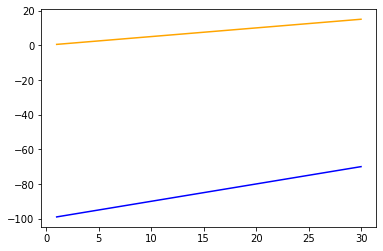

In [209]:
#calculated
plt.plot(q_range, avg_inventory, color='blue')
#approximation
plt.plot(q_range, q_over_2, color='orange')